# Adult Census Income Prediction

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from scipy.stats import stats
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline


C:\Users\prasa\Navigator\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df=pd.read_csv(r'C:\Users\prasa\Dropbox\PC\Desktop\Desktop\Prasath\INeuron\Internship\Adult Census Income Prediction\archive\adult.csv')

In [3]:
df['salary']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

In [4]:
df.drop(['salary'],axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [5]:
data=df.copy()

In [6]:
test_data=df['salary']

In [7]:
data['salary']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

In [8]:
data['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [9]:
data.drop('salary',axis=1,inplace=True)

There are lot of data which contains empty row which is represented as '?' 
so it should be depicted as null value which might be resolved using handling null values techniques.

In [10]:
data=data.replace(' ?',np.nan)

In [11]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


### Finding the Numerical and Categorical Data

In [12]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
dtype: object

### Identifying numerical and categorical variables

In [13]:
data['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [14]:
data['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [15]:
data['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [16]:
data['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [17]:
data['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [18]:
data['fnlwgt'].unique()[:20]

array([ 77516,  83311, 215646, 234721, 338409, 284582, 160187, 209642,
        45781, 159449, 280464, 141297, 122272, 205019, 121772, 245487,
       176756, 186824,  28887, 292175], dtype=int64)

In [19]:
columns=data.columns

In [20]:
numerical_columns=[feature for feature in data.columns if data[feature].dtype!='O']
categorical_columns=[feature for feature in data.columns if data[feature].dtype=='O']

In [21]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country']

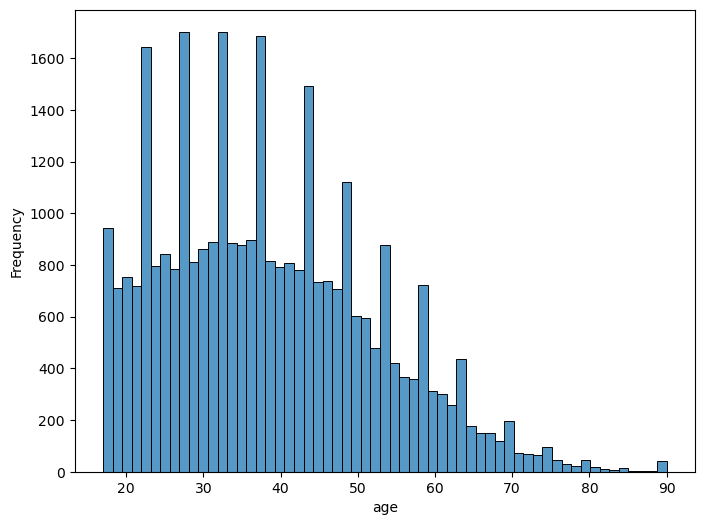

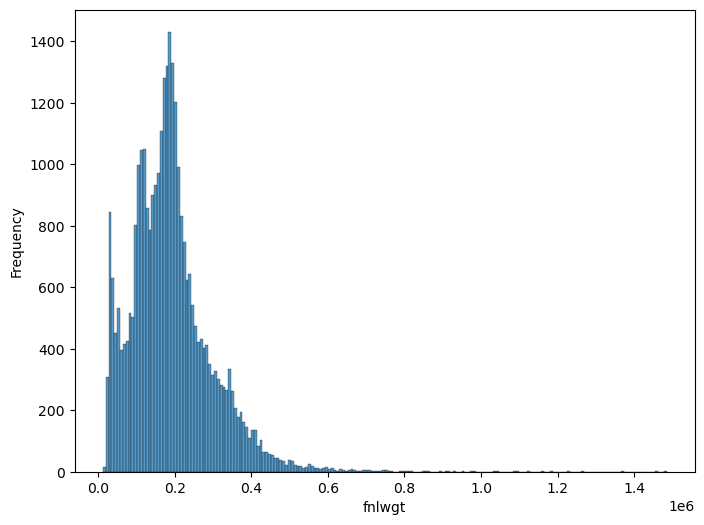

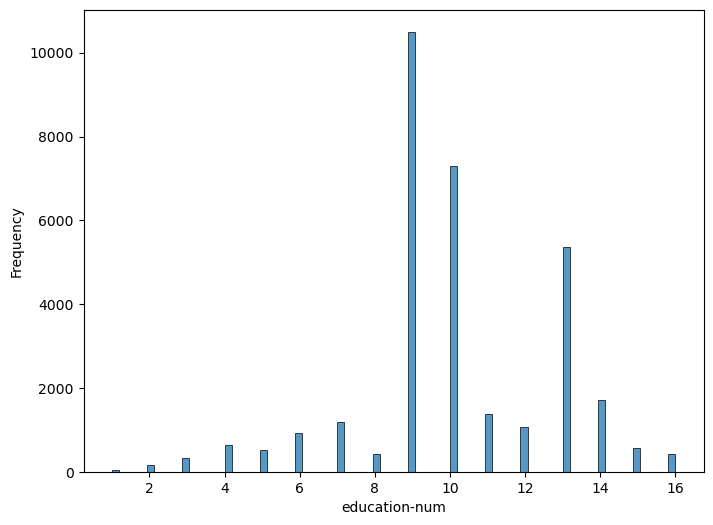

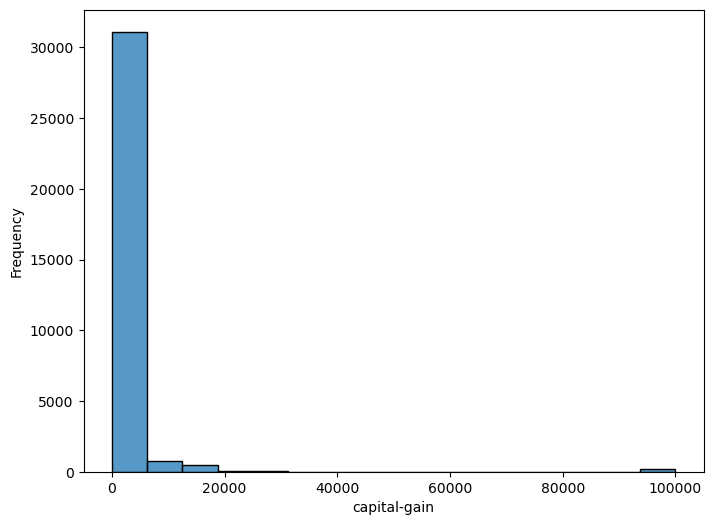

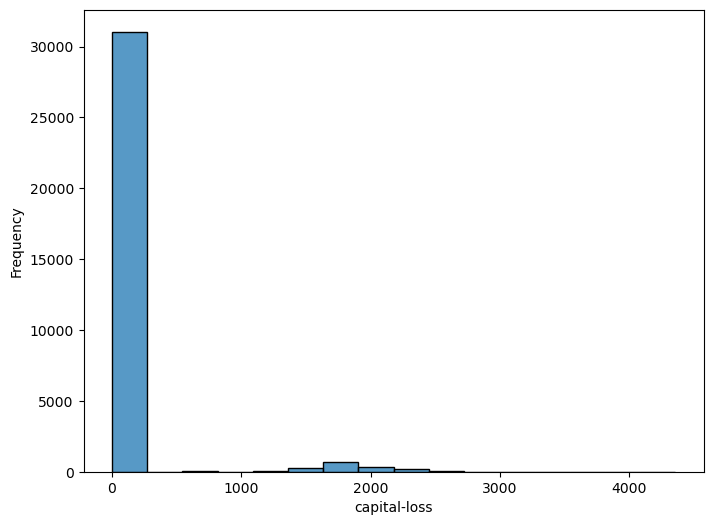

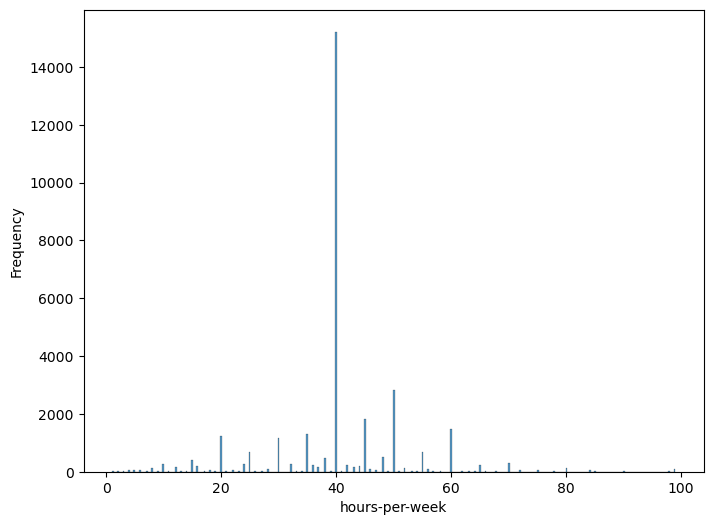

In [22]:
# histograms of discrete variables often show
# a bar plot shape, instead of continuous intervals
for i in numerical_columns:
    plt.figure(figsize=(8,6))
    plt.xlabel(i)
    plt.ylabel('Frequency')
    sns.histplot(data[i])
    plt.show()

Observation:
   - age           ->Continuous
   - fnlwgt        ->Continuous
   - education-num ->Discrete
   - capital-gain  ->Discrete
   - capital-loss  ->Discrete
   - hours-per-week->Discrete
    

## Quantifying missing data

In [23]:
# we can quantify the total number of missing values using
# the isnull() method plus the sum() method on the dataframe

data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
dtype: int64

In [24]:
# alternatively, we can use the mean() method after isnull()
# to visualise the percentage of missing values for each variable

data.isnull().mean()

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
country           0.017905
dtype: float64

Text(0.5, 1.0, 'Quantifying missing data')

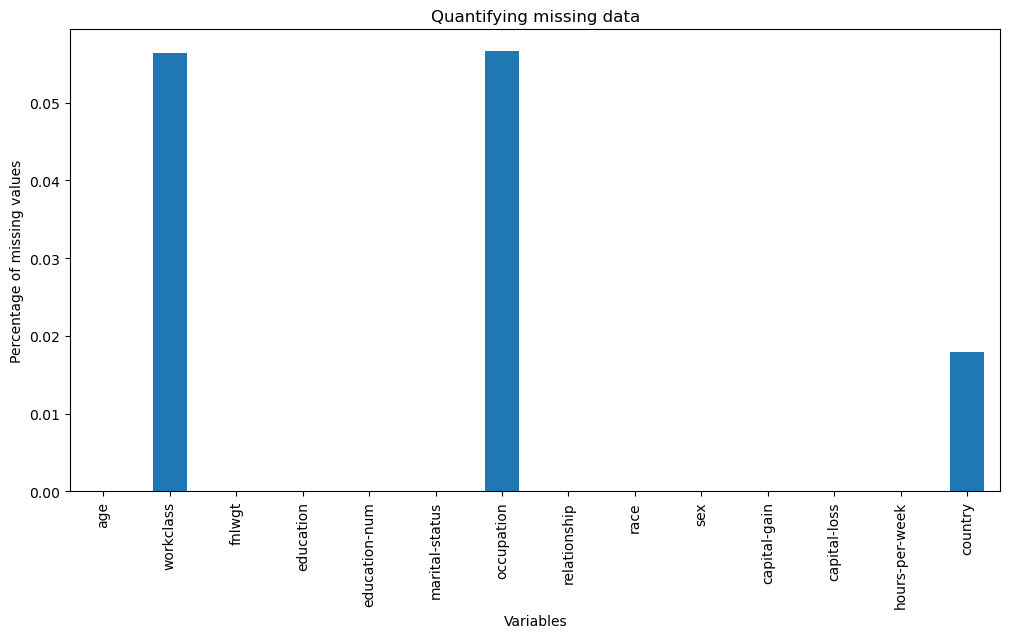

In [25]:
# we can also plot the percentages of missing data utilising
# pandas plot.bar(), and add labels with matplotlib methods 
# as shown below

data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [26]:
##Removing the Feature whose null value percentage is greater than 0.75
for feature in columns:
    if data[feature].isna().mean()>0.75:
        data.drop(feature,axis=1,inplace=True)

In [27]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country']

In [28]:
data['country'].mode()[0]

' United-States'

In [29]:
data['country'].dtypes

dtype('O')

In [30]:
data['age'].dtypes

dtype('int64')

In [31]:
data['workclass'].mode()[0]

' Private'

In [32]:
for feature in categorical_columns:
    data[feature]=data[feature].fillna(data[feature].mode()[0])

In [33]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
dtype: int64

In [34]:
def replace_outliers(data,columns):
    for feature in columns:
        if data[feature].dtypes!='O':
            if data[feature].isna().sum()>0:
                data[data[feature].isna()].fillna(np.median(data[feature]),inplace=True)
        if data[feature].dtypes=='O':
            if data[feature].isna().sum()>0:
                data[data[feature].isna()].fillna(statistics.mode(data[feature]),inplace=True)
    return data.isna().sum()

In [35]:
for feature in columns:
    if data[feature].dtypes!='O':
        if data[feature].isna().sum()>0:
            data[data[feature].isna()].fillna(np.median(data[feature]),inplace=True)
    if data[feature].dtypes=='O':
        if data[feature].isna().sum()>0:
            data[data[feature].isna()].fillna(statistics.mode(data[feature]),inplace=True)

In [36]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
dtype: int64

In [37]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
dtype: int64

## Determining cardinality in categorical variables

In [38]:
# with the following command we can learn the cardinality
# of each of the loaded variables

data[categorical_columns].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
country           41
dtype: int64

In [39]:
# nunique() ignores missing data by default. If we want
# to consider missing values as an additional category
# we need to explicitly mention so, passing the argument
# dropna=False

data[categorical_columns].nunique(dropna=False)

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
country           41
dtype: int64

Text(0.5, 1.0, 'Cardinality')

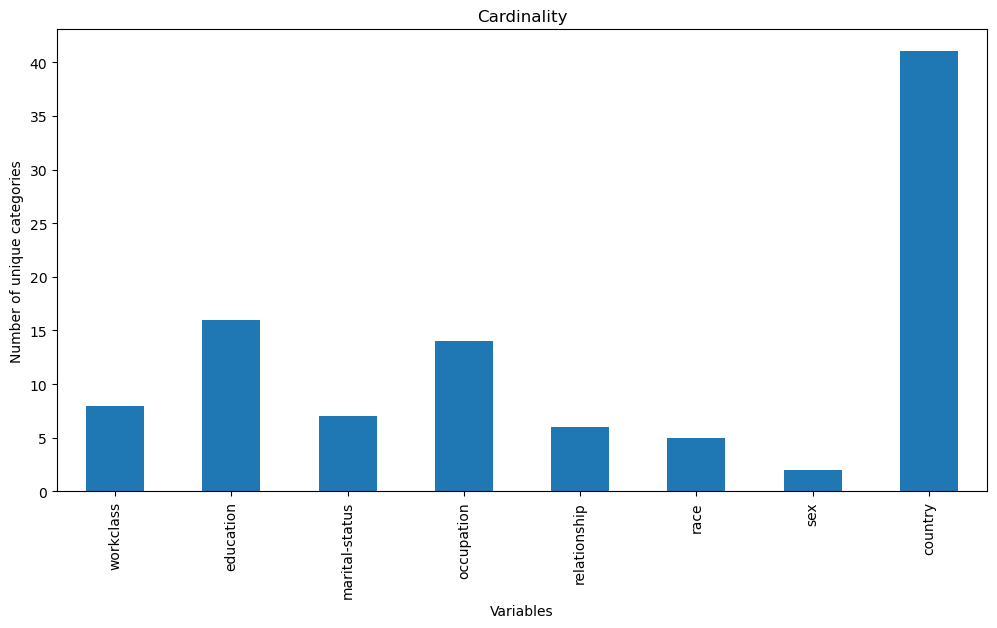

In [40]:
# let's plot the cardinality of the variables 

data[categorical_columns].nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

Observation:
    Country has the highest Cardinality and salary has less Cardinality

## Pinpointing rare categories in categorical variables

In [41]:
print("Unique Values and their frequency of occuring in each categorical features\n")
for i in columns:
    if data[i].dtype=='O':
        print(f'{i}\n')
        print(data[i].value_counts())
        print()
        print("----------------------------------")
        print()

Unique Values and their frequency of occuring in each categorical features

workclass

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

----------------------------------

education

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

----------------------------------

marital-status

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married

                                    workclass  



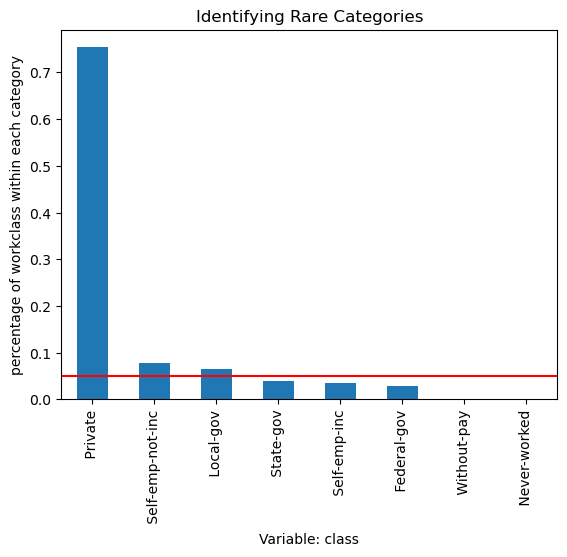

                                    education  



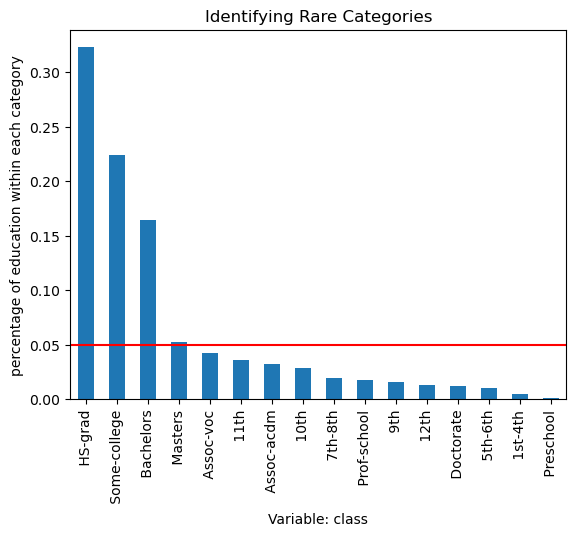

                                    marital-status  



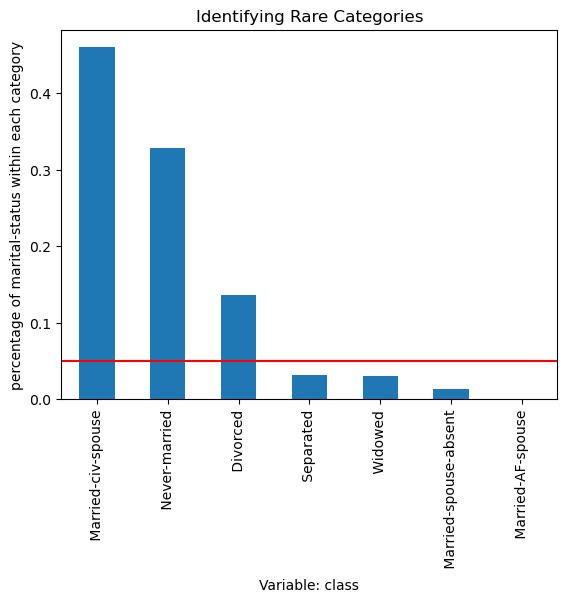

                                    occupation  



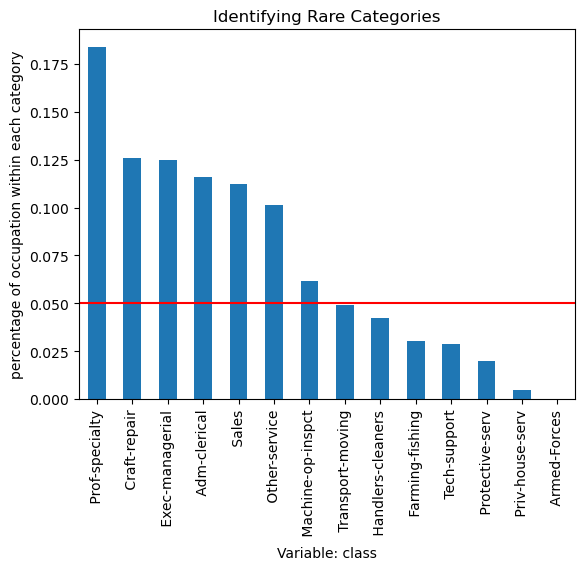

                                    relationship  



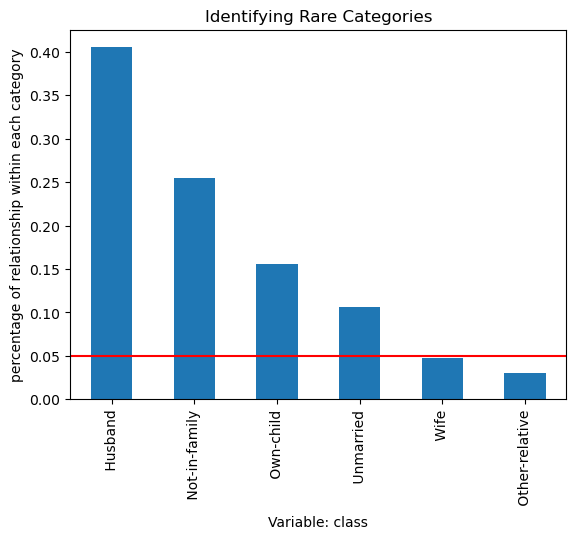

                                    race  



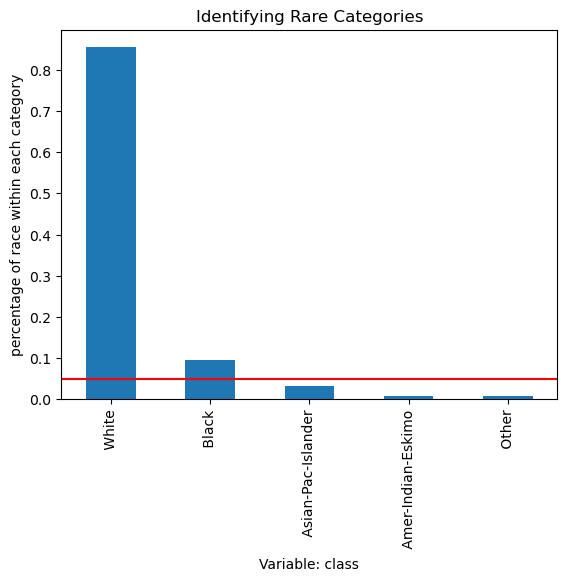

                                    sex  



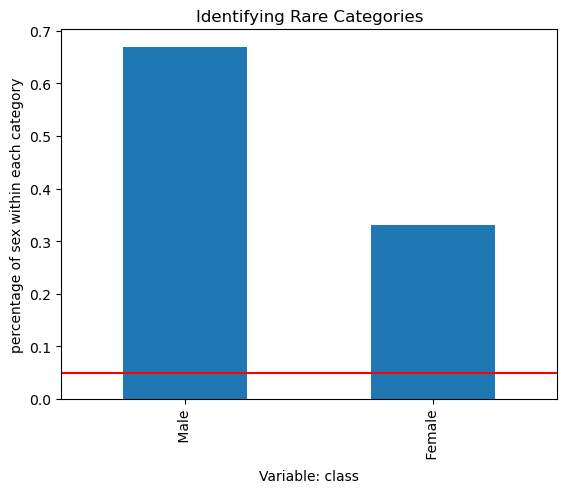

                                    country  



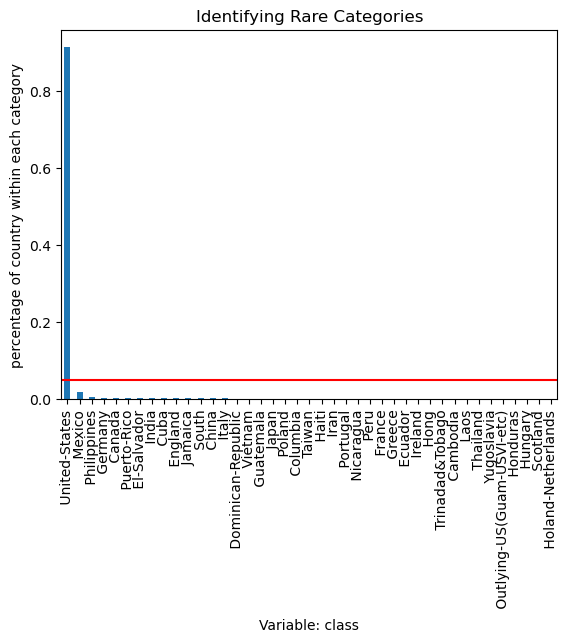

In [42]:
for feature in categorical_columns:
    print(f"                                    {feature}  \n")
    label_freq = data[feature].value_counts() / len(data)
    fig = label_freq.sort_values(ascending=False).plot.bar()
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel(f'percentage of {feature} within each category')
    fig.set_xlabel('Variable: class')
    fig.set_title('Identifying Rare Categories')
    plt.show()

In [43]:
numerical_columns

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

## Identifying a normal distribution

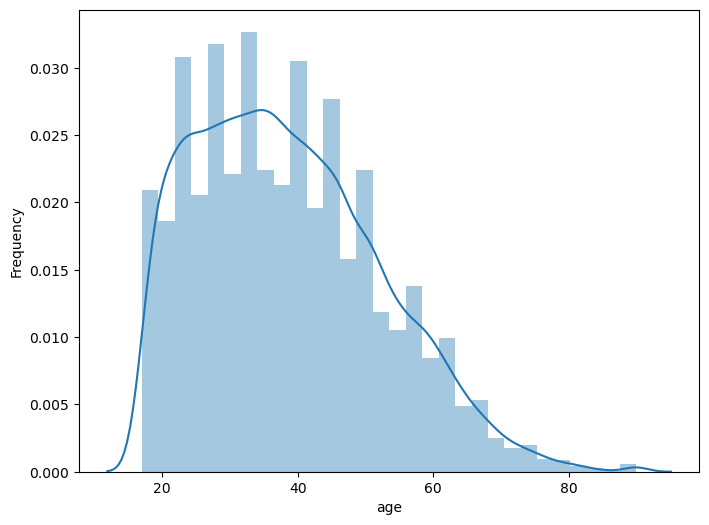

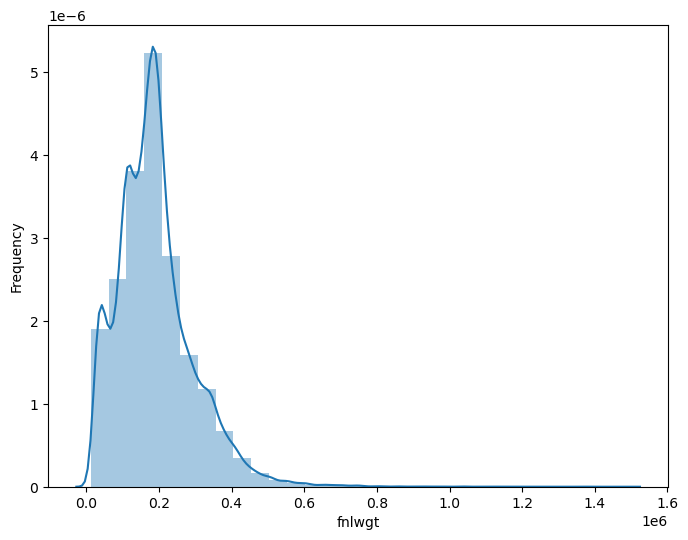

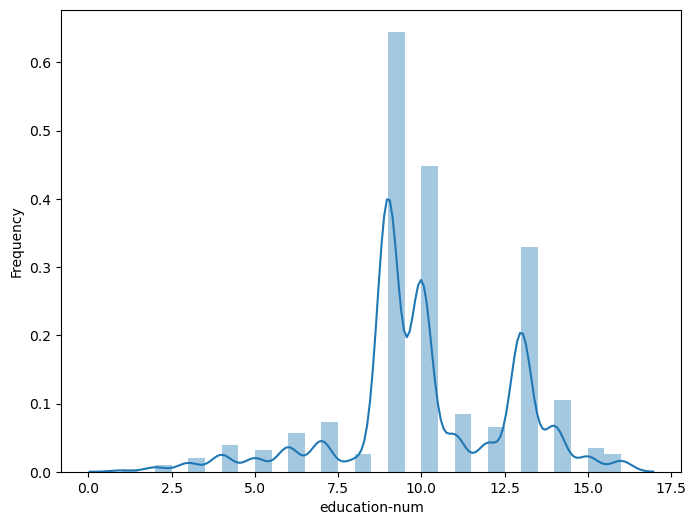

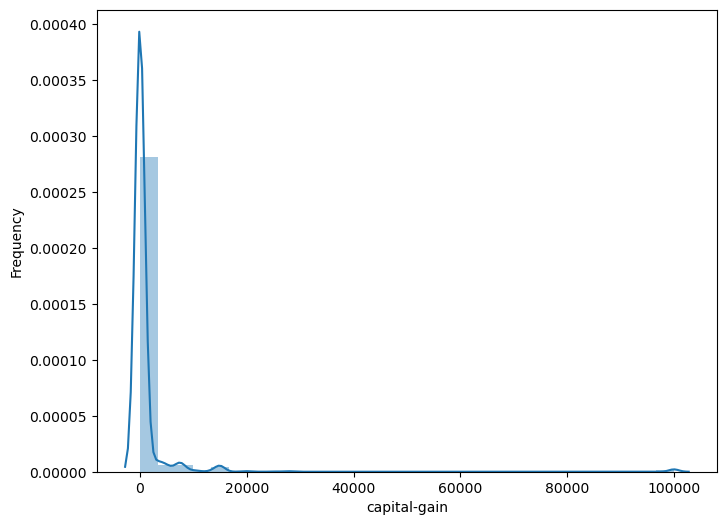

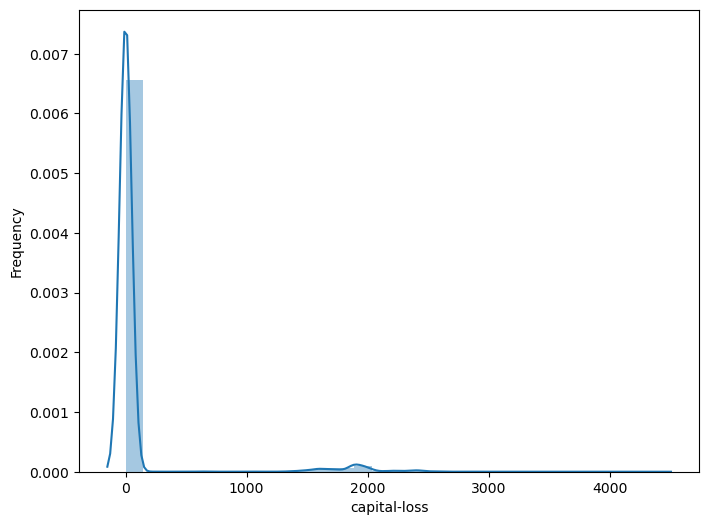

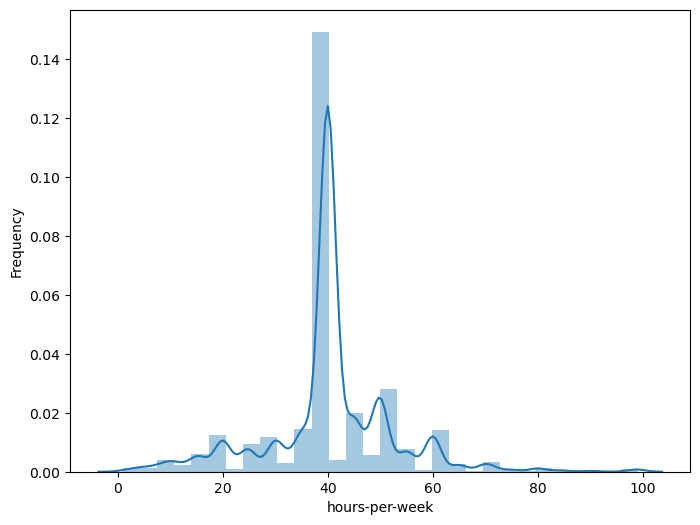

In [44]:
# histograms of discrete variables often show
# a bar plot shape, instead of continuous intervals
for i in numerical_columns:
    plt.figure(figsize=(8,6))
    plt.xlabel(i)
    plt.ylabel('Frequency')
    sns.distplot(data[i],bins=30)
    plt.show()

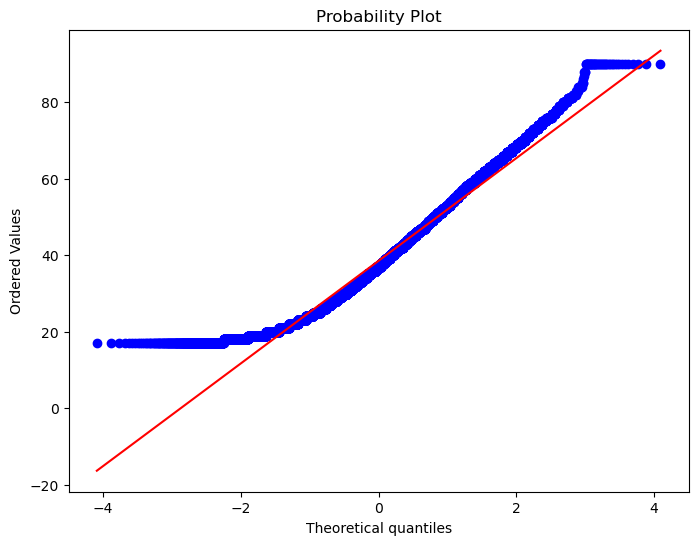

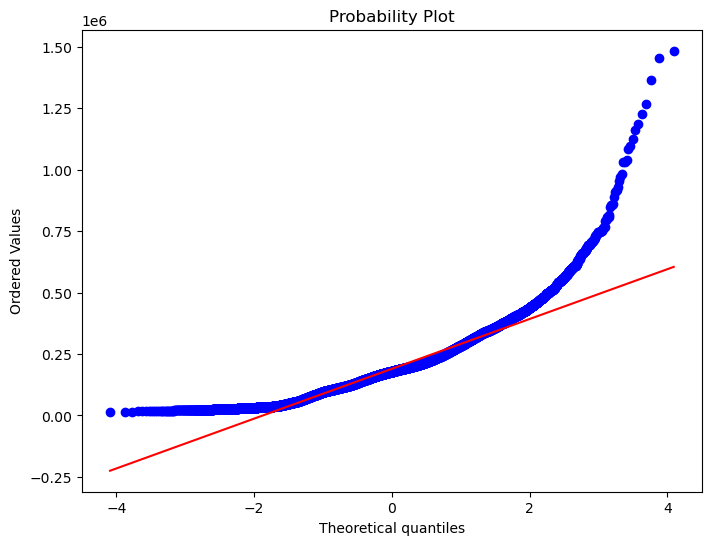

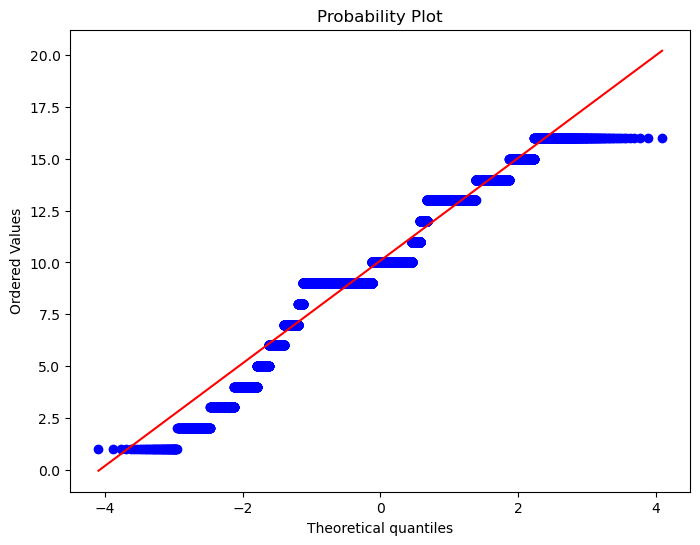

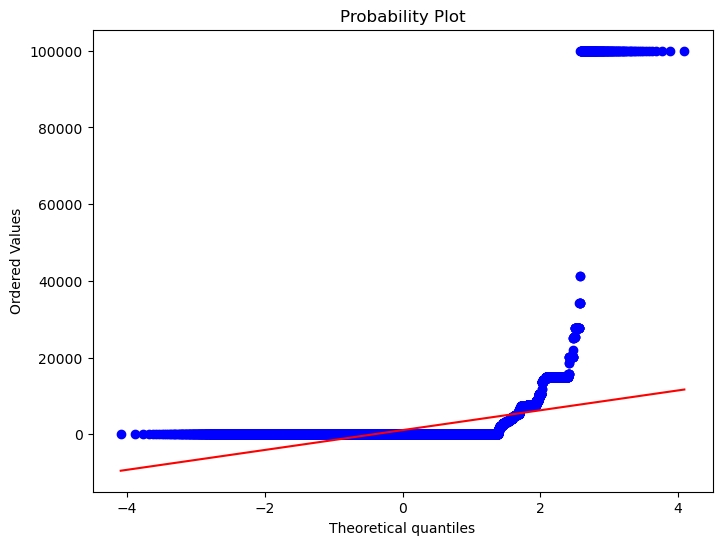

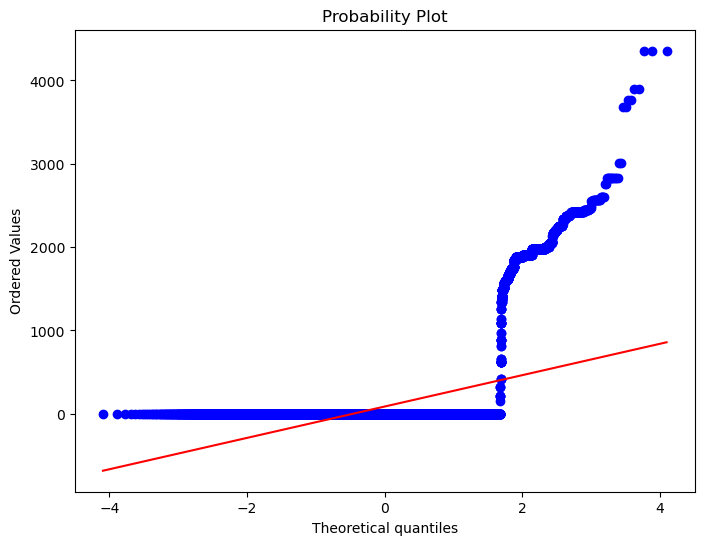

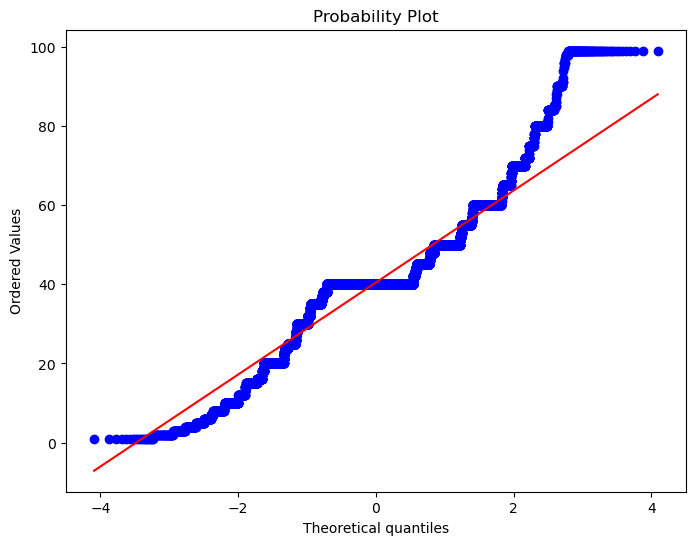

In [45]:
# histograms of discrete variables often show
# a bar plot shape, instead of continuous intervals
import scipy
for i in numerical_columns:
    plt.figure(figsize=(8,6))
    plt.xlabel(i)
    plt.ylabel('Frequency')
    scipy.stats.probplot(data[i], dist="norm", plot=plt)
    plt.show()

## Distinguishing variable distribution

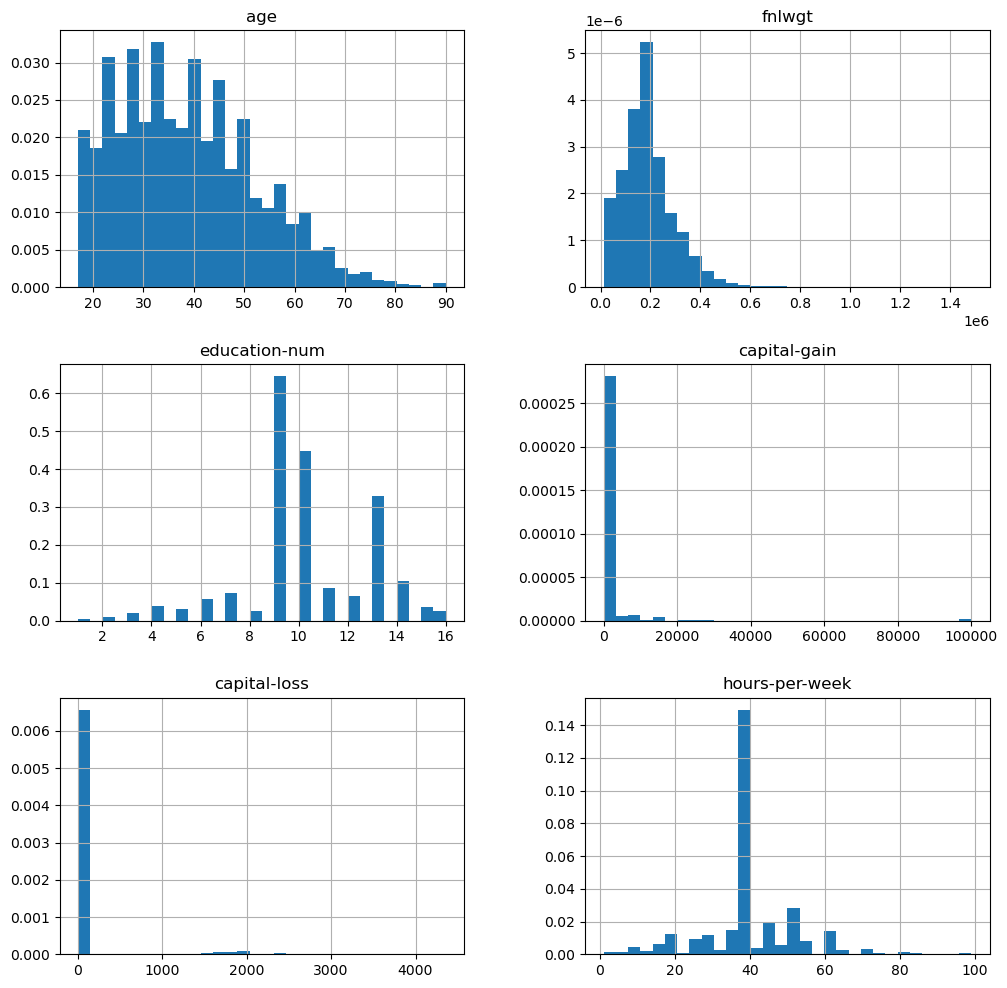

In [46]:
data.hist(bins=30, figsize=(12,12), density=True)
plt.show()

## Highlighting outliers

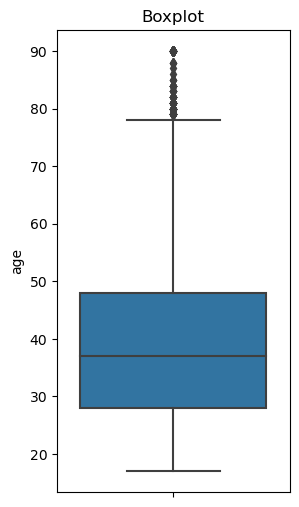

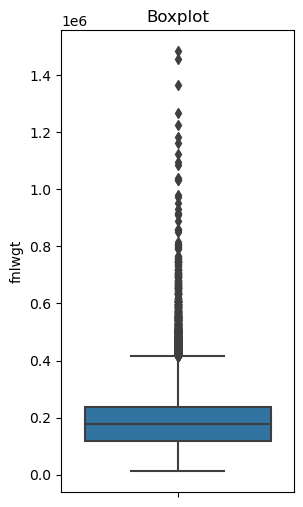

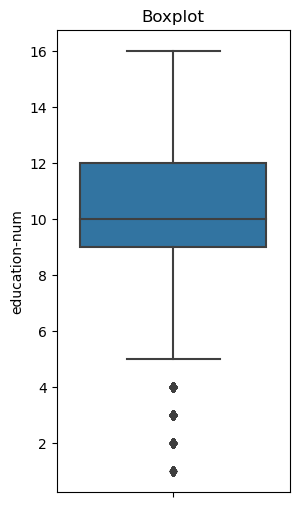

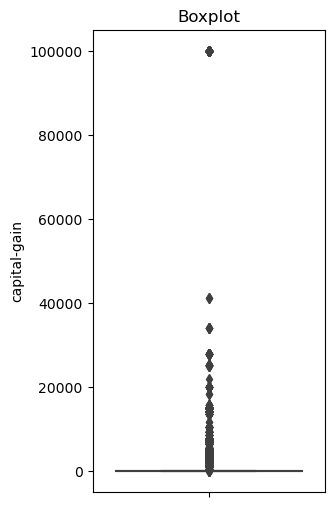

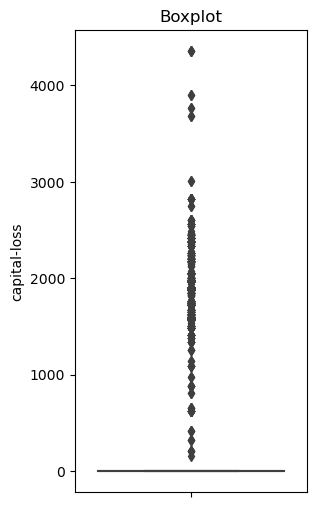

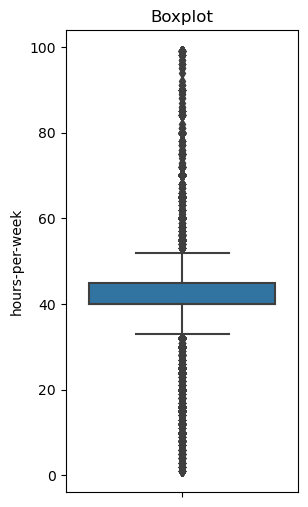

In [47]:
for i in numerical_columns:
    plt.figure(figsize=(3,6))
    sns.boxplot(y=data[i])
    plt.title('Boxplot')
    plt.show()

In [48]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Positive: 0, Negative: 0


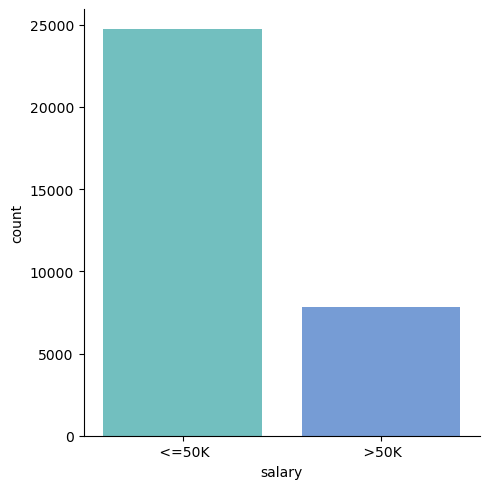

In [49]:
pos = df[df['salary']=='<=50k'].shape[0]
neg = df[df['salary']=='>50k'].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=df, x="salary", kind="count", palette="winter_r", alpha=.6)
plt.show()

**Report**
- The target classes are highly imbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. 
- Hence we should handle imbalanced data with certain methods.

**How to handle Imbalance Data ?**

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

In [50]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [51]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)



        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)


        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(models_list), columns=['Model Name'])
        
    return report

In [52]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [53]:
data.skew()

age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [54]:
columns=data.columns

In [55]:
columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country'],
      dtype='object')

In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [57]:
numerical_columns=[i for i in columns if data[i].dtype!='O']
categorical_columns=[i for i in columns if data[i].dtype=='O']

In [58]:
categorical_columns.pop(-1)

'country'

In [59]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [60]:
data[numerical_columns].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [61]:
data[categorical_columns].head()

,workclass,education,marital-status,occupation,relationship,race,sex
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female


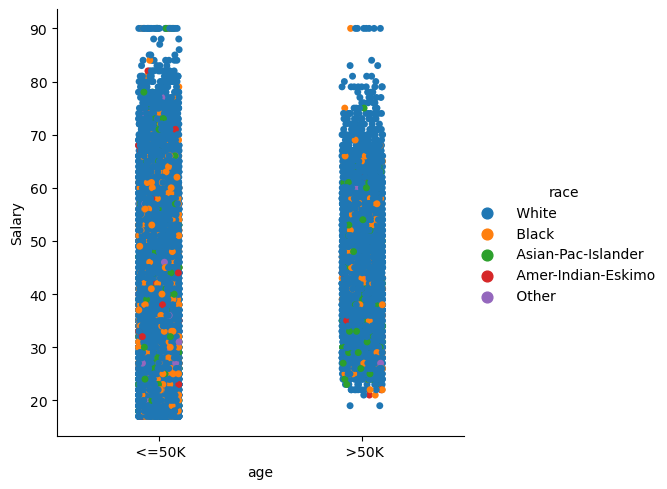

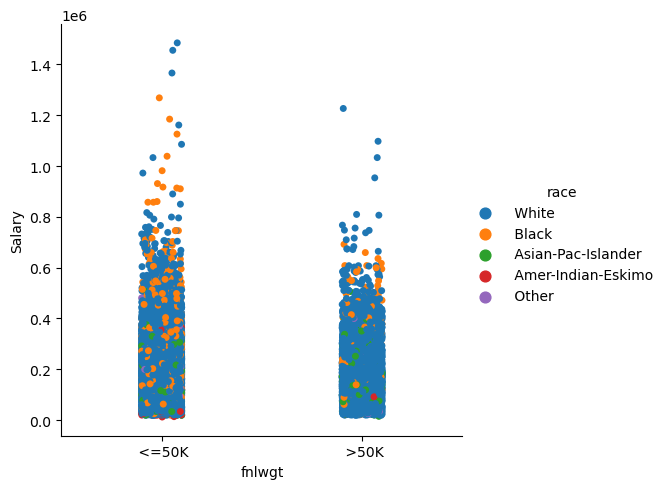

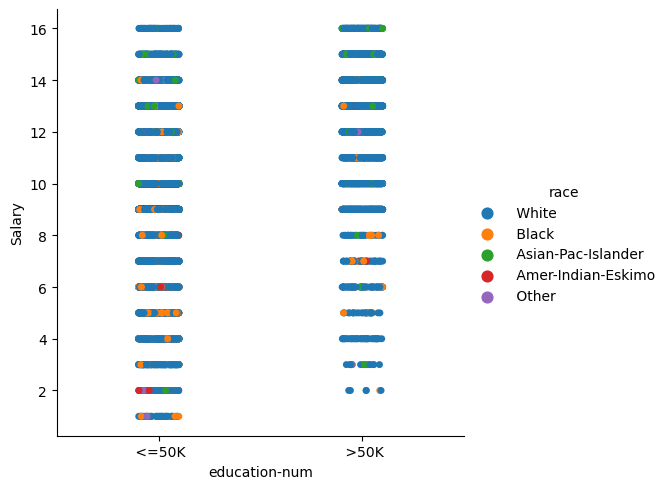

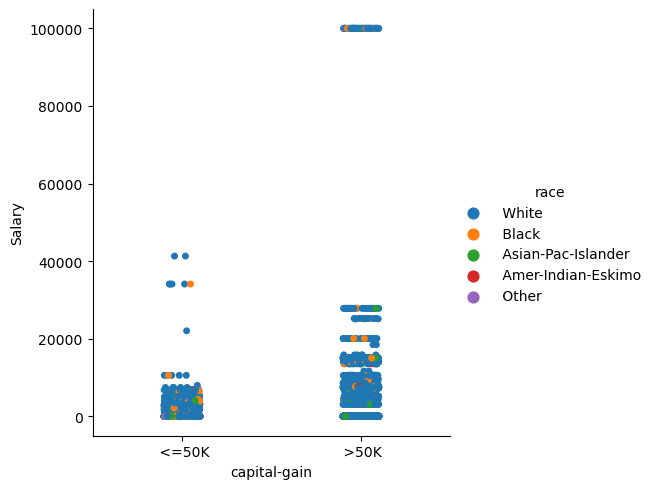

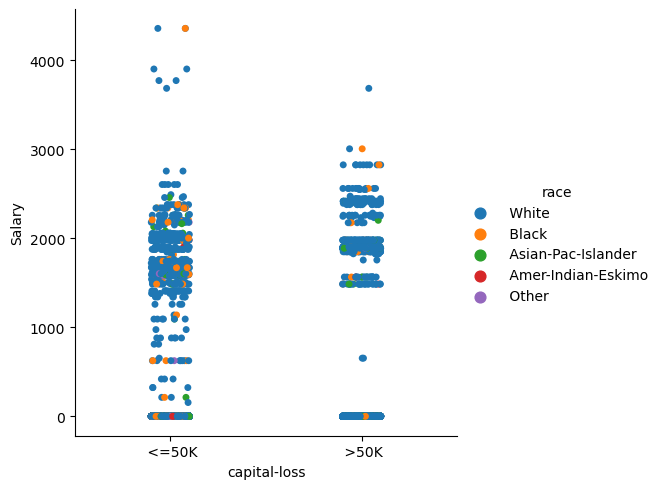

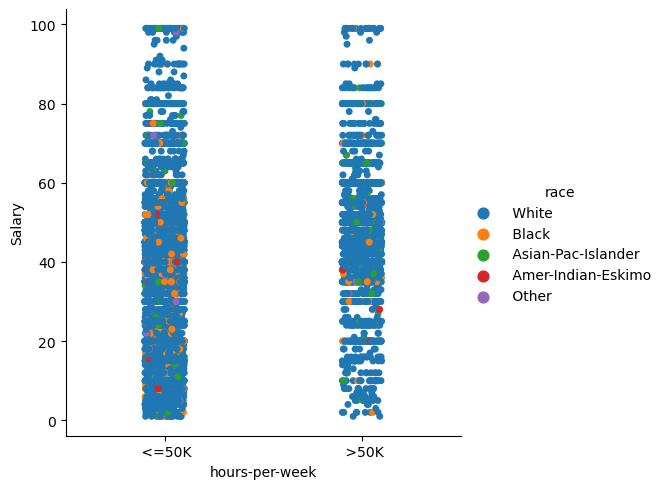

In [62]:
for i in numerical_columns:   
    sns.catplot(x = 'salary', y = i, data = df,hue='race')
    plt.xlabel(i)
    plt.ylabel('Salary')
    plt.show()

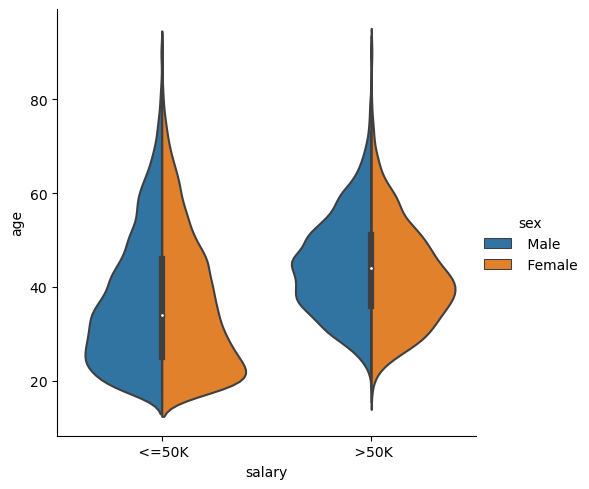

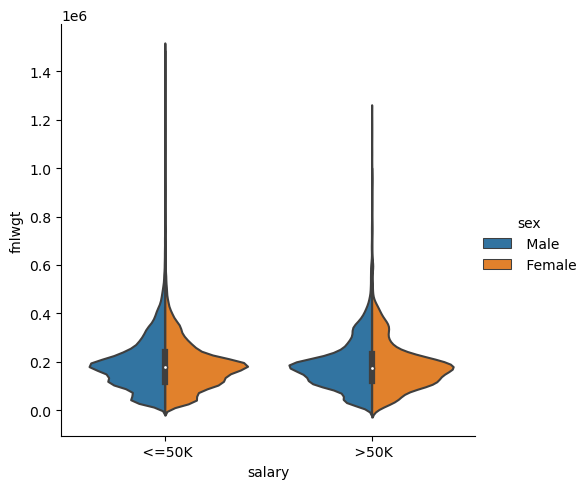

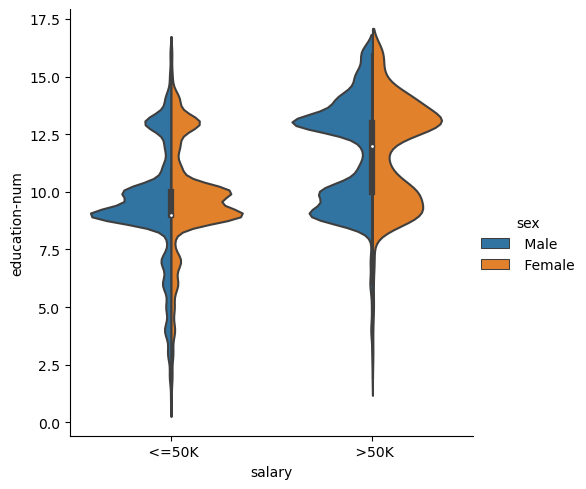

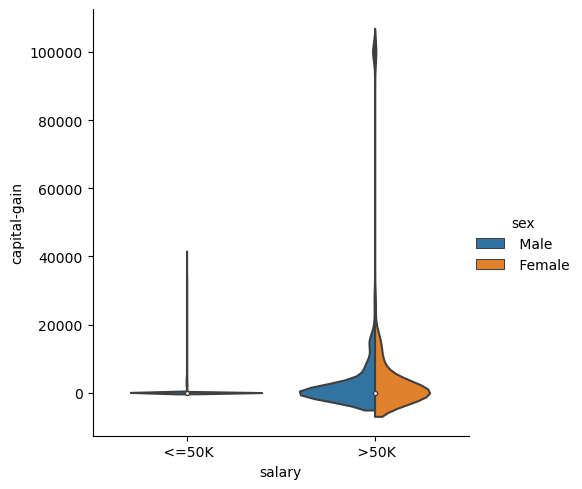

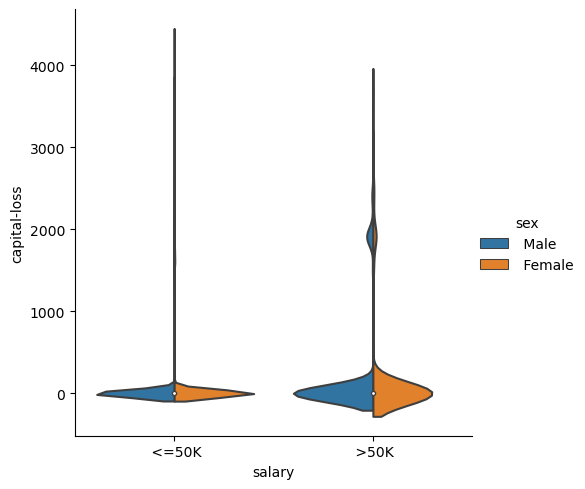

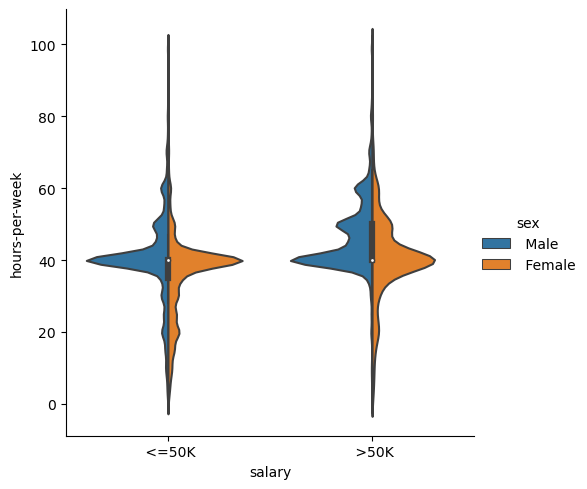

In [63]:
for i in numerical_columns:
    # let add hue = sex column in the above box plot
    sns.catplot(x = 'salary', y = i, data = df, hue = 'sex',kind ='violin',split=True)

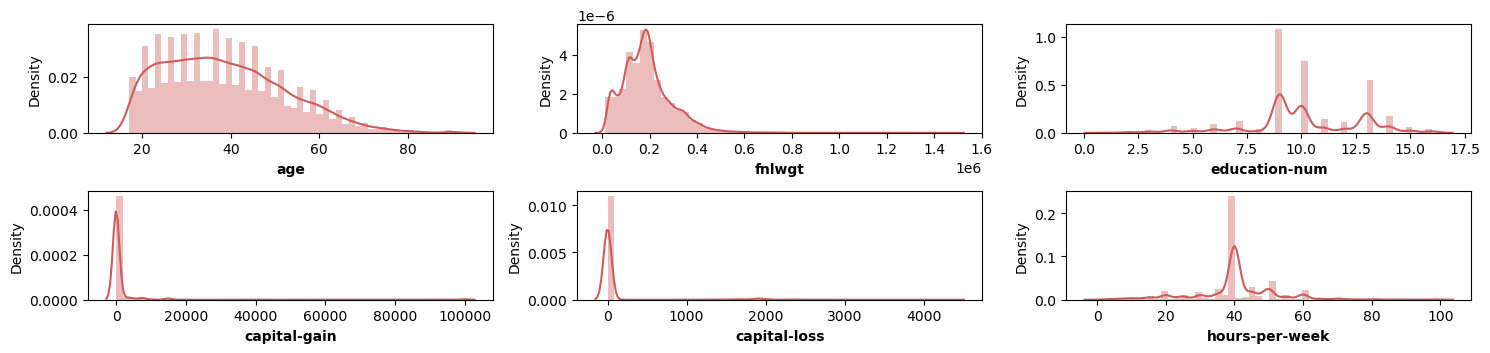

In [64]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numerical_columns):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=data[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()   

In [65]:
# not let's find in a dataframe those outliers:

# the function finds the upper and lower boundaries
# using the IQR proximity rule

# function as presented in the book

def find_boundaries(df, variable):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [66]:
upper_boundary, lower_boundary = find_boundaries(data, 'age')
upper_boundary, lower_boundary

(78.0, -2.0)

In [67]:
# let's flag the outliers in the data set
print("Number of outliers count in each numerical features\n")
for i in numerical_columns:
    upper_boundary, lower_boundary = find_boundaries(data, i)
    outliers = np.where(data['age'] > upper_boundary, True,
                        np.where(data['age'] < lower_boundary, True, False))
    print(f"-------{i}-------\n")
    print(f"{outliers.sum()}")

Number of outliers count in each numerical features

-------age-------

143
-------fnlwgt-------

0
-------education-num-------

32561
-------capital-gain-------

32561
-------capital-loss-------

32561
-------hours-per-week-------

17675


In [68]:
data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

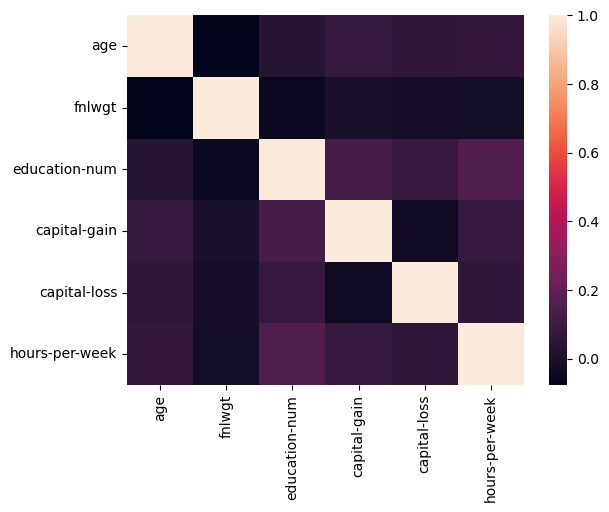

In [69]:
sns.heatmap(data.corr())

In [66]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
dtype: int64

In [122]:
encoder=LabelEncoder()

In [125]:
encoder.fit_transform(y)

array([0, 0, 0, ..., 0, 0, 1])

## Spliting the Independent and Depenedent Feature

In [214]:
X=data
y=test_data

In [215]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [216]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: salary, dtype: object

In [217]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [218]:
X.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
dtype: object

In [219]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [220]:
X_train.shape

(21815, 14)

In [221]:
X_test.shape

(10746, 14)

In [222]:
y_train.shape

(21815,)

In [223]:
y_test.shape

(10746,)

In [224]:
encoder=LabelEncoder()

In [225]:
encoder.fit(y_train)

LabelEncoder()

In [226]:
y_train=encoder.transform(y_train)

In [227]:
y_test=encoder.transform(y_test)

In [228]:
X_train=pd.get_dummies(X_train,drop_first=True)


In [231]:
X_test=pd.get_dummies(X_test,drop_first=True)


### Experiment: 1 = KNN Imputer for Null values

**Why Robust scaler and not Standard scaler?**
- Scaling the data using Robust scaler
- Since most of the independent variables are not normally distributed we cannot use Standardscaler

**Why Robust Scaler and not Minmax?** 
- because most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.
- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [232]:
# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X_train)

**Why KNN Imputer**?
- KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.
- KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.
- Here we Iterates through different K values and get accuracy and choose best K values.

In [233]:
X.isna().sum().sum()

0

In [234]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
27585,51,123429,14,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
18010,46,148489,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22472,25,267431,13,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4585,27,37088,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
11191,47,114459,14,7688,0,45,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**Finding the optimal n_neighbour value for KNN imputer**

In [236]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.7953)
n_neighbors= 3 || accuracy (0.7953)
n_neighbors= 5 || accuracy (0.7953)
n_neighbors= 7 || accuracy (0.7953)
n_neighbors= 9 || accuracy (0.7953)


**We can observe n_neighbors=3 able to produce highest accuracy**

In [239]:
# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [240]:
X_knn =knn_pipeline.fit_transform(X_train)

In [241]:
!pip install imblearn

## Handling Imbalanced data

 **SMOTE+TOMEK** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.
 
 - This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class
 
 - To add new data of minority class
 1. Choose random data from the minority class.
 2. Calculate the distance between the random data and its k nearest neighbors.
 3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 4. Repeat step number 2–3 until the desired proportion of minority class is met.
 
 - To remove the tomek links of the majority class
 1. Choose random data from the majority class.
 2. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
 
 - This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [96]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

## Initialize Default Models in a dictionary

In [97]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

## Fit KNN imputed data for models in dictionary

In [125]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9998
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9140
- F1 score: 0.9138
- Precision: 0.9230
- Recall: 0.9047
- Roc Auc Score: 0.9141


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8749
- F1 score: 0.8753
- Precision: 0.8783
- Recall: 0.8723
- Roc Auc Score: 0.8749


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8827
- F1 score: 0.8791
- Precision: 0.9053
- Recall: 0.8543
- Roc Auc Score: 0.8826
----------------------------------
Model performance for Test set
- Accuracy: 0.8729
- F1 score: 0.8702
- Precision: 0.8953
- Recall: 0.8465
- Roc Auc Score: 0.8731


Logistic Regression
Model performance for Training 

In [120]:
report_knn

,Model Name
0,Random Forest
1,Decision Tree
2,Gradient Boosting
3,Logistic Regression
4,K-Neighbors Classifier
5,XGBClassifier
6,CatBoosting Classifier
7,AdaBoost Classifier


In [107]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


**Insights**
- For the Experiment 1: Knn imputer has XgBoost classifier as the best Model
- Proceeding with further experiments 

## Experiment: 2 = Simple Imputer with Strategy Median

- SimpleImputer is a class in the `sklearn.impute` module that can be used to replace missing values in a dataset, using a variety of input strategies.
- Here we use SimpleImputer can also be used to impute multiple columns at once by passing in a list of column names. SimpleImputer will then replace missing values in all of the specified columns.

In [242]:

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [243]:
median_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('RobustScaler', RobustScaler())])

In [111]:
# Fit X with median_pipeline
X_median = median_pipeline.fit_transform(X)

In [112]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_median, y)

In [113]:
# Training the models
report_median = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9164
- F1 score: 0.9162
- Precision: 0.9246
- Recall: 0.9080
- Roc Auc Score: 0.9165


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8759
- F1 score: 0.8765
- Precision: 0.8785
- Recall: 0.8744
- Roc Auc Score: 0.8759


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8827
- F1 score: 0.8791
- Precision: 0.9053
- Recall: 0.8543
- Roc Auc Score: 0.8826
----------------------------------
Model performance for Test set
- Accuracy: 0.8729
- F1 score: 0.8702
- Precision: 0.8953
- Recall: 0.8465
- Roc Auc Score: 0.8731


Logistic Regression
Model performance for Training 

## Report for Simple Imputer with median strategy

In [119]:
report_median

,Model Name
0,Random Forest
1,Decision Tree
2,Gradient Boosting
3,Logistic Regression
4,K-Neighbors Classifier
5,XGBClassifier
6,CatBoosting Classifier
7,AdaBoost Classifier


**Insights**
- For the Experiment 2: Simple imputer with median strategy has Adaboost classifier as the best Model
- Proceeding with further experiments 

## Fitting the Final model and get reports

In [127]:
final_model = XGBClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_res, y_res)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

[20:12:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [129]:
print("Final XGBoost Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final XGBoost Classifier Accuracy Score (Train) : 0.9370836802664446
Final XGBoost Classifier Accuracy Score (Test) : 0.917360532889259


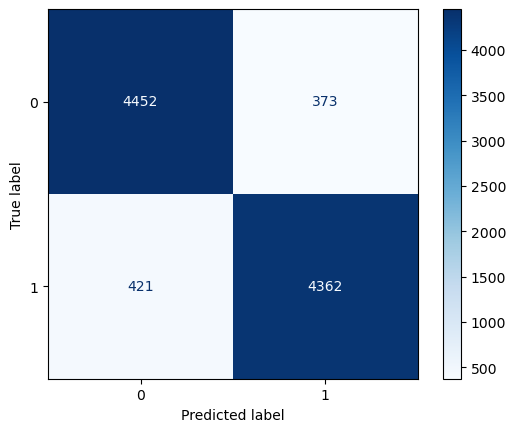

In [130]:
from sklearn.metrics import plot_confusion_matrix

#plots Confusion matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues', values_format='d')

## The best Model is XGBoost Classifier with 91.7% accuracy